# 텐서플로우의 세션 (Session)

- 방향 그래프를 기반으로 설계된 기계학습 라이브러리 
- 세션 :실제로 값을 대입한 그래프가 동작하도록 하는 역활을 수행하는것 

In [1]:
import tensorflow as tf

In [3]:
a = tf.constant(17.5)
b = tf.constant(5.0)

In [4]:
c = tf.add( a, b )
print(c)

Tensor("Add:0", shape=(), dtype=float32)


In [5]:
# Tensor("Add:0", shape=(), dtype=float32) 
# 출력이유는 텐서플로우에서 데이터 처리 단위는 텐서라서 
# 일종의 다차원 배열의 객체 

# K-평균 ( k- means )

- K-평균 알고리즘 => 대표적인 클러스터링 알고리즘 => 비지도 학습
    - 클러스터링: 여러개의 데이터가 있을때 데이터를 군집화하는것 
    - 비슷한 데이터끼리 묶으면 관리하기 쉽다는 장점이 있음 
    
-  k- means 수행과정 
   1. 중심에 가까운 데이터를 클러스터에 포함시킴
   2. 중심을 클러스터의 중앙으로 이동시킴
   
> 결과적으로 완전하게 군집화된 클러스터들을 얻을수 있음 
    -> 중심의 위치가 변하지 않을때까지 반복 
    
    
예시 > 
- 무작위 중심값 선택 알고리즘을 이용해 클러스트링
- 가장 먼 값을 선택해 분류하고 그값과 가장 가까운값을 묶는다.

In [12]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd 
importlib seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 데이터 프레임 생성 
df = pd.DataFrame(columns=['x','y'])

In [11]:
df.loc[0] = [2,3]
df.loc[1] = [2,11]
df.loc[2] = [2,18]
df.loc[3] = [4,5]
df.loc[4] = [4,7]
df.loc[5] = [5,3]
df.loc[6] = [5,15]
df.loc[7] = [6,6]
df.loc[8] = [6,8]
df.loc[9] = [6,9]

df.loc[10] = [7,2]
df.loc[11] = [7,4]
df.loc[12] = [7,5]
df.loc[13] = [7,17]
df.loc[14] = [8,18]
df.loc[15] = [8,5]
df.loc[16] = [8,4]
df.loc[17] = [9,10]
df.loc[18] = [9,11]
df.loc[19] = [9,15]

df.loc[20] = [9,15]
df.loc[21] = [9,19]
df.loc[22] = [10,5]
df.loc[23] = [10,8]
df.loc[24] = [12,6]
df.loc[25] = [13,5]
df.loc[26] = [14,11]
df.loc[27] = [15,6]
df.loc[28] = [15,18]
df.loc[29] = [18,12]

df.head(30)

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


Text(0.3,0.5,'y')

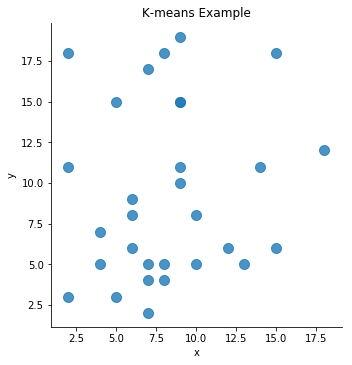

In [17]:
sb.lmplot('x', 'y', data = df, fit_reg = False, scatter_kws={"s":100})
plt.title('K-means Example')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# K-means를 활용한 클러스터링 


In [20]:
points = df.values
kmeans = KMeans(n_clusters = 4).fit(points)
kmeans.cluster_centers_

array([[ 7.        , 16.71428571],
       [11.14285714,  7.28571429],
       [15.66666667, 13.66666667],
       [ 5.53846154,  5.53846154]])

In [21]:
kmeans.labels_

array([3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 2])

In [22]:
df['cluster'] = kmeans.labels_
df.head(30)

,x,y,cluster
0,2,3,3
1,2,11,3
2,2,18,0
3,4,5,3
4,4,7,3
5,5,3,3
6,5,15,0
7,6,6,3
8,6,8,3
9,6,9,3


Text(0.5,1,'K-means Example')

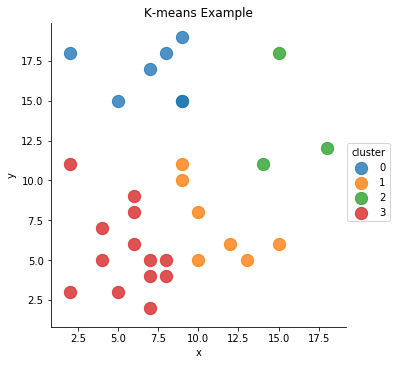

In [23]:
sb.lmplot('x', 'y', data = df, fit_reg = False, scatter_kws={"s":150}, hue = "cluster")
plt.title('K-means Example')
#데이터 마이닝 